파이썬 머신러닝 완벽가이드 ch6. 1~ 5 pg. 399~ 430

### **[개념 정리]📝**


# **CHAPTER 6**

---
### **01.차원 축소의 개요**


- 차원축소: 많은 피처로 구성된 다차원 데이터 세트이 차원을 축소해 새로운 차원의 데이터 세트를 생성
   - 차원 증가 > 회소한 구조, 예측 신뢰도 떨어짐
   - 피처가 많은 경우 > 개별 피처간 상관관계 높을 가능성, 다중 공산성 문제 > 예측 성능 저하
   - 피처 수를 줄이면 직관적 해석 가능, 시각적 표현 수월, 학습 데이터 크기가 줄어 처리능력 줄일 수 있음

- 피처 선택: 특정 피처에 종속성 강한 피처 제거, 추요 피터만 선택
- 피처 추출: 기존 피처를 저차원의 중요 피처로 압축해서 추출, (완전 다른 값이 됨)
   - 단순 압축 아닌 또 다른 공간으로 매핑해 추출. 함축적인 요약 특성으로 추출

- 차원 축소로 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출할 수 있음.

- 대표 차원 축소 알고리즘: PCA, LDA, SVD, NMF
    - 이미지 데이터(많은 픽셀)의 함축적 이미지 변환과 압축 수행: 분류 수행 시 과적합 영향력 감소, 예측 성능 높아짐
    - 텍스트 문서의 숨겨진 의미를 추출: 단어 구성 속 시맨틱이나 토픽을 잠재 요소로 간주하고 찾아냄. 시맨틱 토픽 모델링





---
### **02.PCA (Principal Component Analysis)**

- 여러 변수 간의 상관관계를 이용해 주성분을 추출해 차원 축소
- 정보 유실 최소화하기 위해 가장 높은 분산을 가지는 데이터 축을 찾아 이 축으로 차원 축소. 즉 **분산**이 데이터 특성 가장 잘 반영한다고 간주

 > 1. 가장 큰 데이터 변동성을 기반으로 첫 번째 벡터 축 생성
 2. 이 축에 직각이 되는 직교 벡터 축이 두번째 축
 3. 두 번째 축과 직각이 되는 벡터를 세 번째 축으로 생성
 4. 생성된 벡터 축에 원본데이터 투영      
       => 벡터 개수만큼의 차원으로 원본 데이터 타원 축소

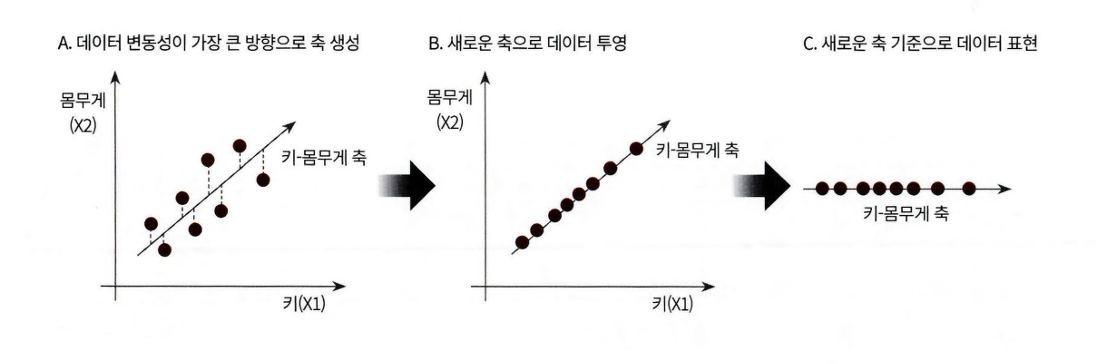


- 선형대수 관점: 입력 데이터의 공분산 행렬을 고유값으로 분해, 고유 벡터에 입력 데이터를 선형 변환
  - 고유벡터: PCA의 주성분 벡터. 입력 데이터의 분산이 큰 방향을 나타냄.
    - 행렬 A를 곱해도 방향이 변하지 않고 그 크기만 변하는 벡터
    - 정방행렬은 최대 그 차원 수만큼의 고유벡터를 가짐
    - 행렬 분해에 사용
  - 고유값: 고유벡터의 크기, 입력 데이터의 분산
  - 선형변환: 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것. 특정 벡터를 하나의 공간에서 다른 공간으로 투영하는 개념
  - 공분산: 두 변수 간의 변동. Cov(X,Y)>0은 X 증가 시 Y 증가함을 의미.
  - 공분산 행렬: 여러 공분산을 포함하는 정방향 행렬. 대각선 원소는 각 변수의 분산, 외의 원소는 모든 변수 쌍 간 공분산.
      - 정방행렬: 열과 행이 같은 행렬
      - 대칭행렬: A^T=A. 항상 고유벡터를 직교행렬로, 고유값을 정방행렬로 대각화할 수 있음
      - 공분산 = 고유벡터 직교행렬 * 고유값 정방행렬 * 고유벡터 직교행렬의 전치

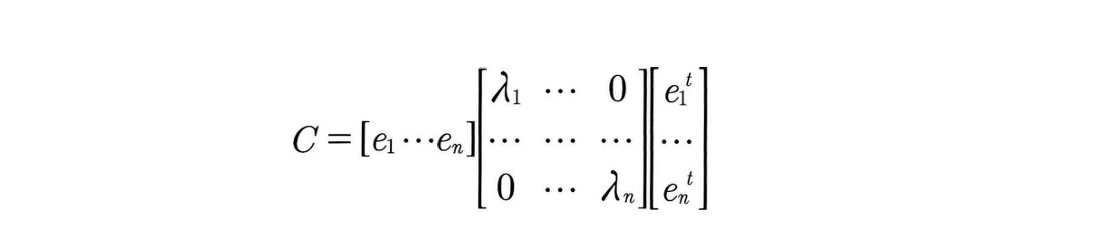

- PCA: 입력 데이터의 공분산 행렬은 고유벡터와 고유값으로 분해되며 분해된 고유벡터로 입력 데이터를 선형 변환하는 방식.

>  1. 입력 데이터 세트의 공분산 행렬 생성
 2. 공분산 행렬의 고유벡터와 고유값 계산
 3. 고유값이 가장 큰 순대로 K개 고유벡터 추출
 4. 고유값 큰 순으로 추출된 고유벡터로 새롭게 입력 데이터 변환

- PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일이 중요. 개별 속성 스케일 후 PCA 적용
- PCA(n_components=n): n은 변환할 차원 수
- pca.explained_variance_ratio_: 개별 PCA 요소 별 차지하는 변동성 비율

- 높은 상관도를 가진 속성들은 소수의 PCA로도 변동성 수용할 수 있음

- 지도학습
- 컴퓨터 비전 분야에서 활발히 적용




---
### **03. LDA (Linear Discriminant Analysis)**

- LDA(선형 판별 분석법): PCA처럼 입력 데이터를 저차원 공간에 투영해 차원을 축소하는 기법. 지도학습의 분류에 사용하기 쉽도록 개별 결정 클래스 분별 기준으로 함.    
   - 즉 클래스 간 분산과 클래스 내부 분산 비율을 최대화함.
   - PCA와의 차이점: 공분산 행렬이 아닌 클래스 간 분산과 내부 분산 행렬 생성, 이에 기반한 고유벡터를 이용해 입력 데이터 투영.

> 1. 클래스 내부, 클래스 간 분산 행렬 구함. 입력 데이터의 결정 값 클래스 별 개별 피처의 평균 벡터를 기반
2. 클래스 내부 분산 $S_w$,클래스 간 분산 $S_b$ 두 행렬을 고유벡터로 분해
3. 고유값이 가장 큰 순으로 K개 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 입력 데이터 변환

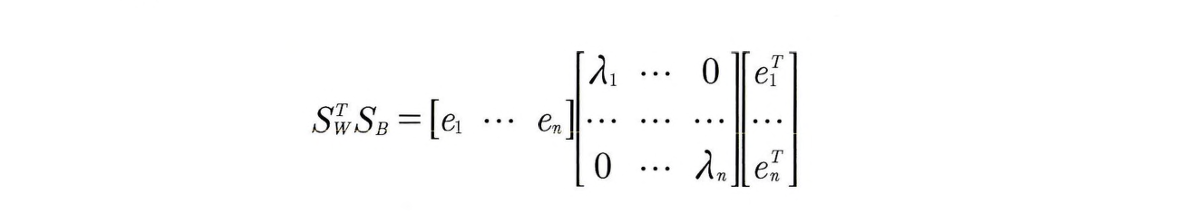



- 붓꽃 데이터 세트에 LDA 적용:
  - 표준정규분포 스케일링
  - LDA는 비지도 학습이므로 fit()에서 클래스 결정값이 필요
  - LinearDiscriminantAnalysis(n_components=2)
  - PCA 변환 데이터와 좌우 대칭 형태로 닮음

---
### **04. SVD (Singular Value Decomposition)**

- PCA와 유사한 행렬분해 기법 이용. 정방행렬(PCA)뿐 아니라 행과 열의 크기가 다른 행렬에도 적용함.
- SVD: 특이값 분해
    - 분해된 벡터는 특이벡터(서로 직교하는 성질),
    - 대각행렬 시그마: 대각 이외의 값은 모두 0, 대각값은 A 행렬의 특이값
    - 일반적으로 시그마 비대각 부분과 대각 원소중 0인 부분도 제거 후 (대응되는 원소 다 제거) 차원 줄인 컴팩트한 형태로 SVD 적용함

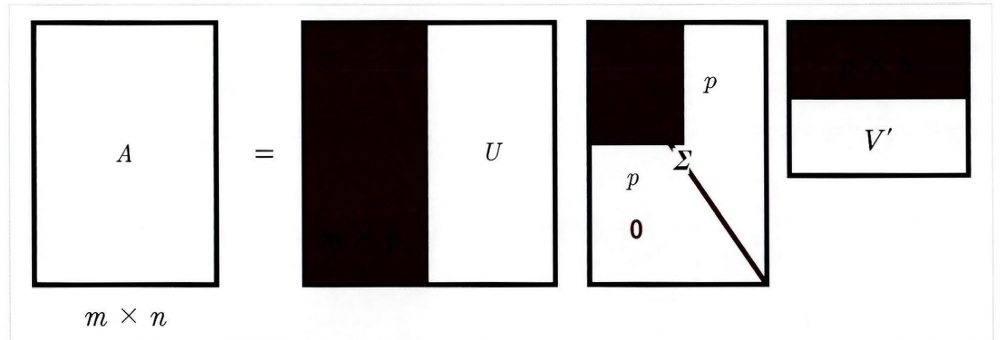

- Truncated SVD: 시그마의 대각원소 중 상위 몇개만 추출 후 (대응 원소 다 제거) 더 차원 줄인 형태로 분해

- 넘파이, 사이파이로 수행: numpy.linalg.svd
   - U, sigma, Vt = svd(a): 원본 행렬 a 입력 시 다 반환됨
   - 다시 내적하면 원본으로 복원됨, 이때 시그마는 다시 0포함하도록 대칭행렬로 반환
   - Truncated SVD로 분해된 행렬로 복원하는 경우 근사적으로 복원됨

- 사이킷런 TruncatedSVD 클래스를 이용한 변환: TruncatedSVD(n_components=n)
   - 분해 행렬들 반환 X
   - PCA처럼 fit(), transform()으로 원본 데이터를 차원 축소해 변환
   - 원본 데이터를 분해된 U*Sigma 행렬에 선형 변환해 생성
   - PCA와 유사하게 변환. 두 클래스 모두 SVD이용해 행렬 분해. 데이터 스케일링 후 두 클래스 변환(중심이 동일해짐)하면 거의 동일한 변환을 수행.

- PCA도 SVD알고리즘으로 구현. 밀집행렬 변환만 가능, SVD는 희소행렬 변환도 가능

- 컴퓨터 비전 영역, 이미지 압축, 텍스트 토칙 모델링 기법 기반


---
### **05. NMF (Non-Negative Matrix Factorization)**

- NMF: 낮은 랭크를 통한 행렬근사 방식 변형. 행렬 내 모든 원소 값이 모두 양수면 두개의 양수 행렬로 분해
- 행렬분해: SVD같은 행렬분해 기법 통칭. W(길고가는행렬)*H(작고 넓은 행렬)로 분해
   - W: 잠재요소 값이 얼마나 되는지 대응
   - H: 잠재요소가 원본 열로 어떻게 구성됐는지 나타냄
- 차원 축소를 통한 잠재 요소 도출. 추천 영역에 활발하게 적용.(잠재 요소 기반 추천 방식)
- NMF(n_components=n)

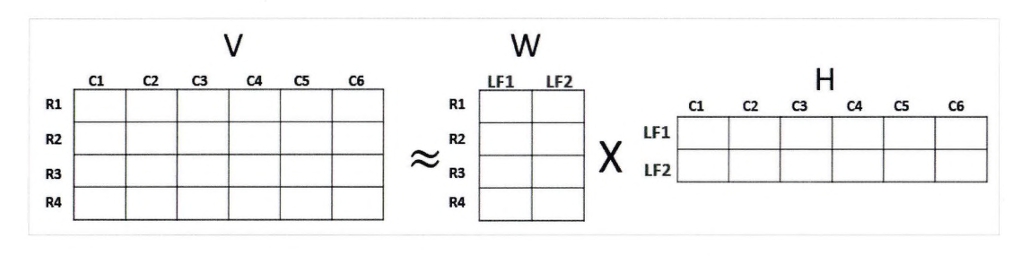

### **06. 정리**

- PCA: 입력 데이터의 변동성이 가장 큰 축을 구하고, 직각인 축을 반복적으로 구한 뒤 입력데이터를 축들에 투영해 차원 축소
   - 공분산 행렬 기반 고유 벡터 생성, 선형 변환
- LDA: PCA와 유사한 방식. 입력데이터의 결정 값 클래스를 최대한 분리할 수 있는 축 찾기
- SVD와 NMF: 고차원 행렬을 두개의 저차원 행렬로 분리하는 행렬분해기법. 잠재 요소 추출

### **[코드 필사]📝**

**2. PCA**

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


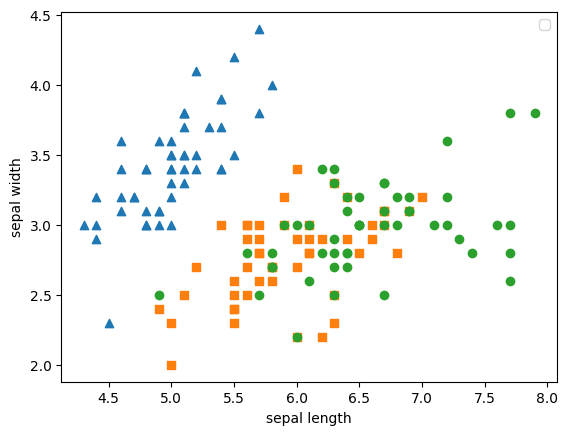

In [ ]:
# 품종에 따른 데이터 세트 분포 확인 -> 2차원 시각화
# setosa는 세모, versicolor는 네모, virqinica는 동그라미로 표현
markers = ['^','s','o']

# setosa의 target값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도 표시
for i, marker in enumerate(markers):
  x_axis_data=irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data=irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data, y_axis_data, marker=marker)

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

- 4개의 속성을 2개로 압축

In [ ]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [ ]:
# PCA 변환된 데이터 칼럼명을 각각 pca_component_1, pca_component_2
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


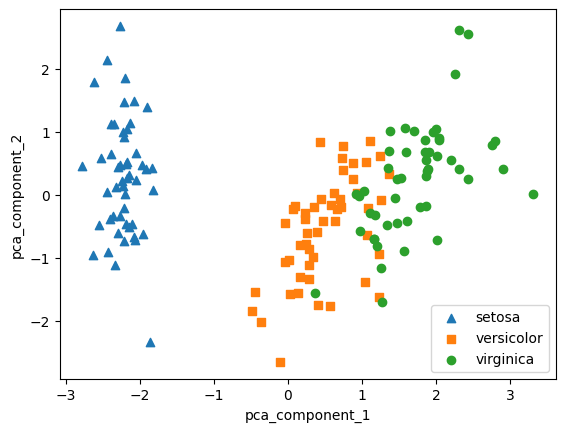

In [ ]:
# setosa는 세모, versicolor는 네모, virqinica는 동그라미로 표현
markers = ['^','s','o']

# pca_component_1을 x축, pca_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
  x_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [ ]:
# 전체 변동성에서 개별 PCA 컴포넌트별 차지하는 변동성 비율
# 두개의 요소로도 95% 설명 가능
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [ ]:
# 원본과 PCA 변환 세트에 각각 분류(랜덤포레스트 이용), 비교(교차 검증 세트 정확도)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:',np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [ ]:
pca_X = irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy',cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:',np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


- 신용카드 데이터 세트

In [ ]:
# header로 의미없는 첫 행 제거, iloc으로 기존 id 제거
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/ESAA/과제/pca_credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [ ]:
# default payment next month 속성이 Target 값.

df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default',axis=1)

<Axes: >

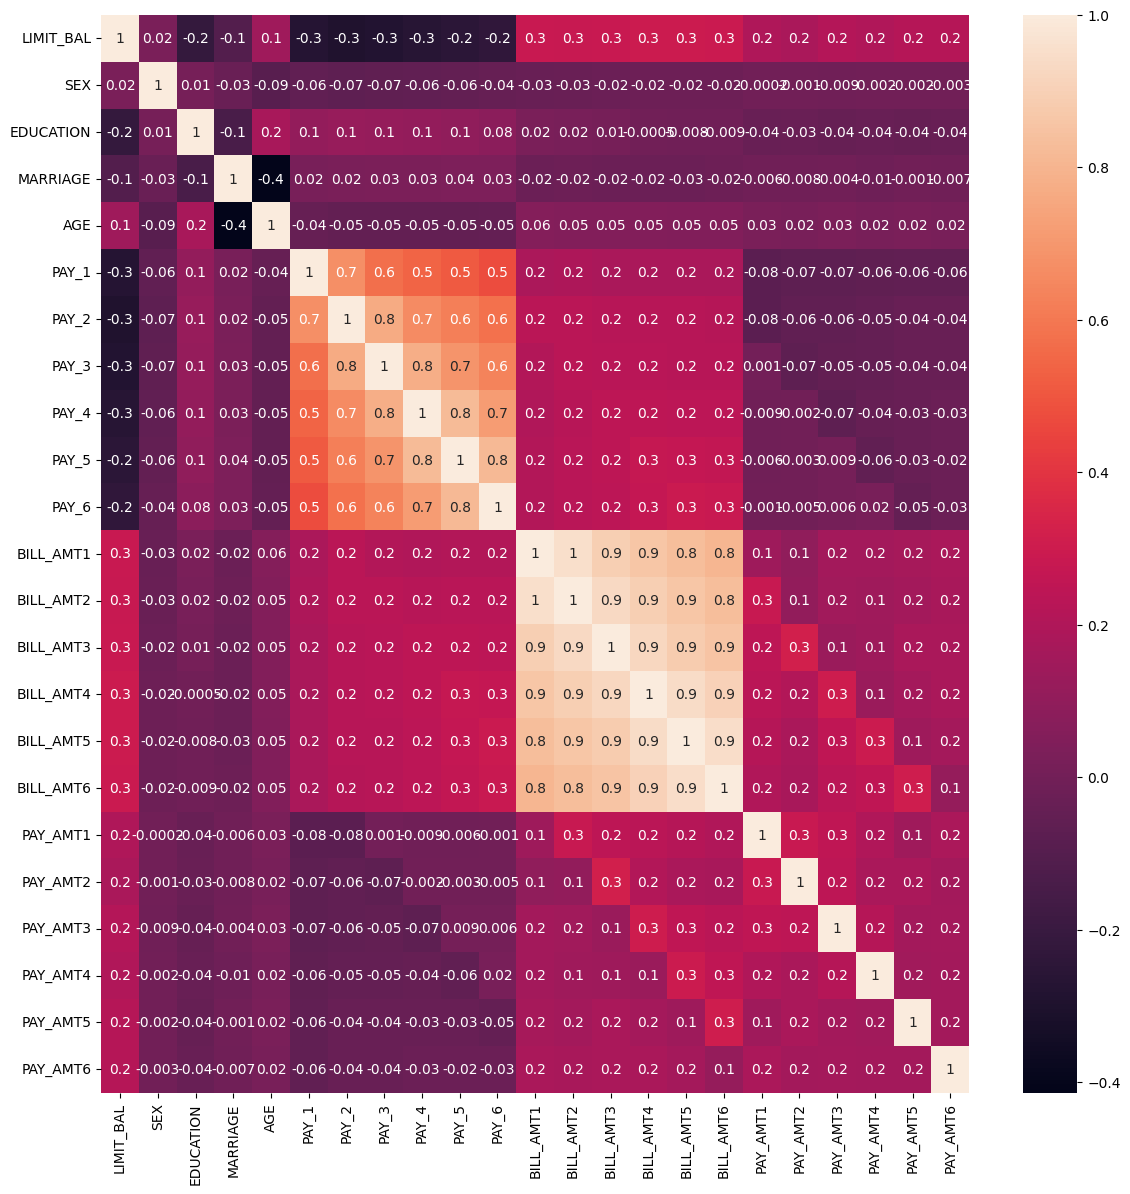

In [ ]:
from ast import increment_lineno
# 속성 간 상관도 구하고 히트맵 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr=X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [ ]:
# BILL_AMT 6개 속성을 2개의 요소로 PCA 변환. 개별 요소의 변동성 확인

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


In [ ]:
# 원본과 2개 속성으로 변환한 분류 예측 결과 비교
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 개별 Fold 세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3인 경우의 개별 Fold 세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [ ]:
# PCA 변환한 데이터 세트에 대해 동일하게 분류 예측 적용
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 컴포넌트를 가진 PCA 변환을 수행하고 corss_val_score()로 분류 예측 수행.
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7913 0.7972 0.802 ]
PCA 변환 데이터 세트 평균 정확도:0.7968


**3. LDA**

- 붓꽃 데이터 세트에 LDA 적용하기

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [ ]:
# 2개의 컴포넌트로 LDA 변환, 지도학습이므로 결점값이 변환(fit)시 필요함 주의

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


In [ ]:
# LDA 변환된 입력 데이터 값을 2차원에 품종별로 표현
import pandas as pd
import numpy as np

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target
irisDF_lda.head(3)

,lda_component_1,lda_component_2,target
0,8.061800,-0.300421,0
1,7.128688,0.786660,0
2,7.489828,0.265384,0


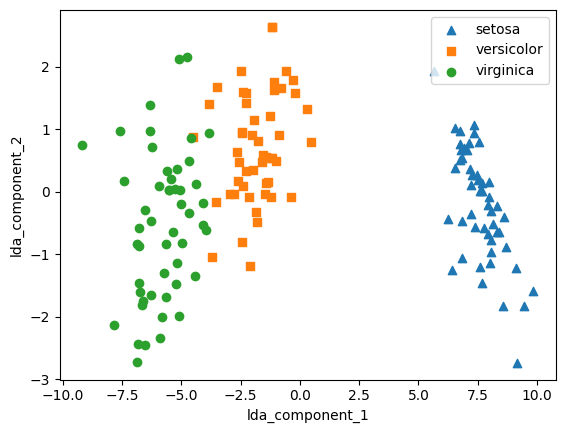

In [ ]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^','s','o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도 표시
for i, marker in enumerate(markers):
  x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

**4. SVD**

In [ ]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4X4 랜덤 행렬 a생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [ ]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma,3))
print('V transpose matrix:\n', np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [ ]:
# Sigma를 다시 0을 포함한 대칭행렬로 반환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [ ]:
# 로우 간 관계에 의존성 부여
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [ ]:
# 다시 SVD 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [ ]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [ ]:
# Truncated SVD 사이파이 이용해 테스트

import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:',Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:',Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # Output of TruncatedSVD

print('\nTruncated SCD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SCD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

- 사이킷런 TruncatedSVD 클래스를 이용한 변환

Text(0, 0.5, 'Truncated SVD Component 2')

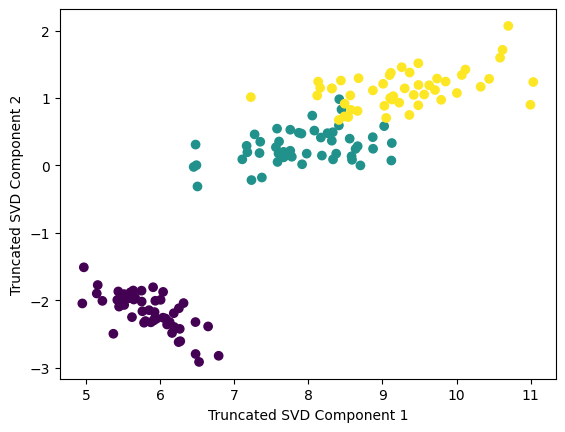

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x = iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('Truncated SVD Component 1')
plt.ylabel('Truncated SVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

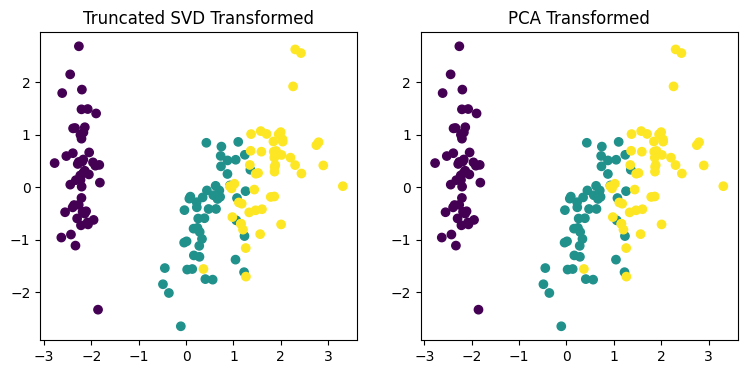

In [ ]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandarfScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4),ncols=2)
ax1.scatter(x = iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [ ]:
# 두 행렬값과 원본 속성별 요소 비율값은 거의 같음

print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3390953525955403e-15
-7.632783294297951e-17


**05. NMF**

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

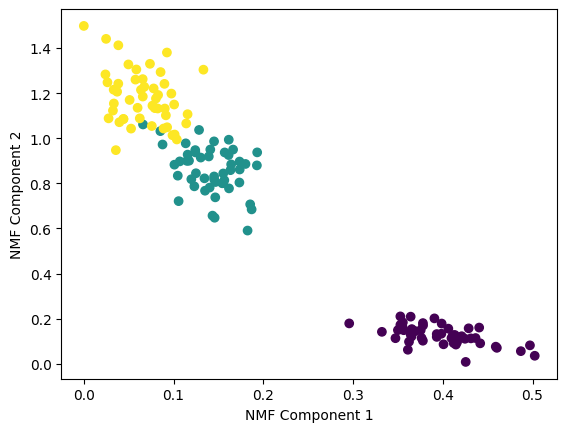

In [ ]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')